# ANOMALY DETECTION

https://scikit-learn.org/stable/modules/outlier_detection.html

La detección de outliers (anomalías) y la detección de novedades son dos conceptos relacionados pero distintos en el campo de la detección de anomalías. Ambos son válidos para identificar patrones inusuales en los datos, pero se aplican en diferentes contextos y con diferentes supuestos.
## Outlier Detection

- Definición: La detección de outliers implica identificar observaciones que son significativamente diferentes o anómalas en comparación con la mayoría de los datos. Estos outliers pueden ser debidos a variaciones en la medición, errores experimentales, o simplemente representar variabilidad natural en los datos.

- Supuestos: Se supone que el conjunto de datos utilizado para entrenar el modelo ya contiene outliers. El modelo aprende a identificar estos outliers en base a los patrones presentes en el conjunto de datos completo.

- Uso: Es común en situaciones donde los datos ya tienen algunos ejemplos de comportamiento anómalo, y el objetivo es identificar más de estos casos.

## Novelty Detection

- Definición: La detección de novedades, por otro lado, se enfoca en identificar nuevas observaciones que difieren significativamente de los datos en los que el modelo fue entrenado. Estas observaciones novedosas pueden no estar presentes en el conjunto de datos de entrenamiento.

- Supuestos: Se asume que el conjunto de datos de entrenamiento está libre de outliers y representa solo el comportamiento "normal". El modelo aprende este comportamiento normal y luego identifica cualquier desviación significativa como novedosa.

- Uso: Es particularmente útil en aplicaciones donde es crucial detectar cambios o eventos nuevos que no se han observado antes.

## Aplicación en Detección de Anomalías

Ambos enfoques son válidos para la detección de anomalías, pero su elección depende del contexto específico:

- Outlier Detection: Útil cuando puedes asumir que tu conjunto de datos incluye tanto datos normales como anómalos, y el objetivo es identificar los anómalos.

- Novelty Detection: Apropiado cuando tienes un conjunto de datos limpio de comportamiento normal y deseas identificar cualquier cosa que se desvíe de este patrón normal.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import os

# Lectura de datos

The dataset refers to the operating parameters of an HVAC system that controls the environmental comfort of a non-residential building located in Turin (Italy).

The dataset contains 11 variables:

    timestamp;
    temperatures of return, supply, and outdoor air [°C];
    relative humidities of return, supply and outdoor air [% and outdoor air [%];
    the temperature setpoint of the return air [°C];
    the saturation temperature in the humidifier [°C];
    power required by the fans [kW];
    energy required by the fans [kWh].

The data refer to the winters 2019-2020 and 2020-2021.

The Source of this dataset is Borda, Davide (2022), “Development of Anomaly Detectors for HVAC Systems using Machine Learning”, Mendeley Data, V1, doi: 10.17632/mjhr46dkj6.1
Please click here for the web link

In [2]:
path = "../data/Anomaly_detection/raw_data/"
data = "HVAC_NE_EC_19-21.csv"


df = pd.read_csv(os.path.join(path, data))

df.head()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
0,2019-10-15 00:00:00+02:00,19.859999,20.469999,18.5,19.02,20.299999,71.110001,58.919998,79.5,0.0,0.0
1,2019-10-15 00:15:00+02:00,19.855000,20.430000,18.5,19.02,20.299999,71.320000,59.000000,82.0,0.0,0.0
2,2019-10-15 00:30:00+02:00,19.850000,20.410000,18.5,19.02,20.299999,71.470001,59.109997,79.5,0.0,0.0
3,2019-10-15 00:45:00+02:00,19.840000,20.379999,18.5,19.08,20.299999,71.439995,59.309998,77.0,0.0,0.0
4,2019-10-15 01:00:00+02:00,19.830000,20.350000,18.5,19.08,20.299999,71.580002,59.559998,79.5,0.0,0.0


## inspección de datos

In [3]:
df.tail()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
33883,2021-04-14 22:45:00+02:00,19.539999,20.004999,20.5,19.619999,14.7,39.020000,27.930000,57.0,0.0,0.0
33884,2021-04-14 23:00:00+02:00,19.520000,19.949999,20.5,19.539999,13.7,39.020000,28.090000,57.0,0.0,0.0
33885,2021-04-14 23:15:00+02:00,19.430000,19.955000,20.5,19.420000,13.7,39.399998,27.930000,57.0,0.0,0.0
33886,2021-04-14 23:30:00+02:00,19.420000,19.920000,20.5,19.400000,13.7,39.599998,28.039999,57.0,0.0,0.0
33887,2021-04-14 23:45:00+02:00,19.420000,19.900000,20.5,19.400000,13.7,39.599998,28.150000,57.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888 entries, 0 to 33887
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     33888 non-null  object 
 1   T_Supply      33888 non-null  float64
 2   T_Return      33888 non-null  float64
 3   SP_Return     33888 non-null  float64
 4   T_Saturation  33888 non-null  float64
 5   T_Outdoor     33888 non-null  float64
 6   RH_Supply     33888 non-null  float64
 7   RH_Return     33888 non-null  float64
 8   RH_Outdoor    33888 non-null  float64
 9   Energy        33888 non-null  float64
 10  Power         33888 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.8+ MB


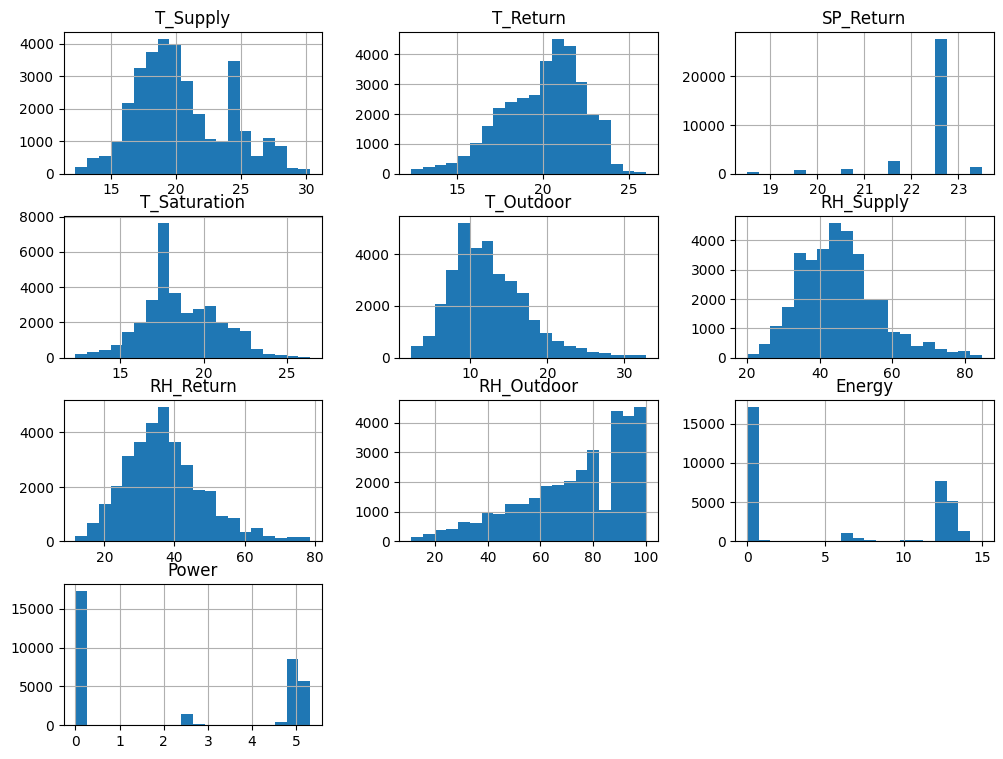

In [5]:
#plt.title('Feature distribution')
df.hist(figsize= (12, 9), bins= 20)
plt.show()

In [6]:
df.columns

Index(['Timestamp', 'T_Supply', 'T_Return', 'SP_Return', 'T_Saturation',
       'T_Outdoor', 'RH_Supply', 'RH_Return', 'RH_Outdoor', 'Energy', 'Power'],
      dtype='object')

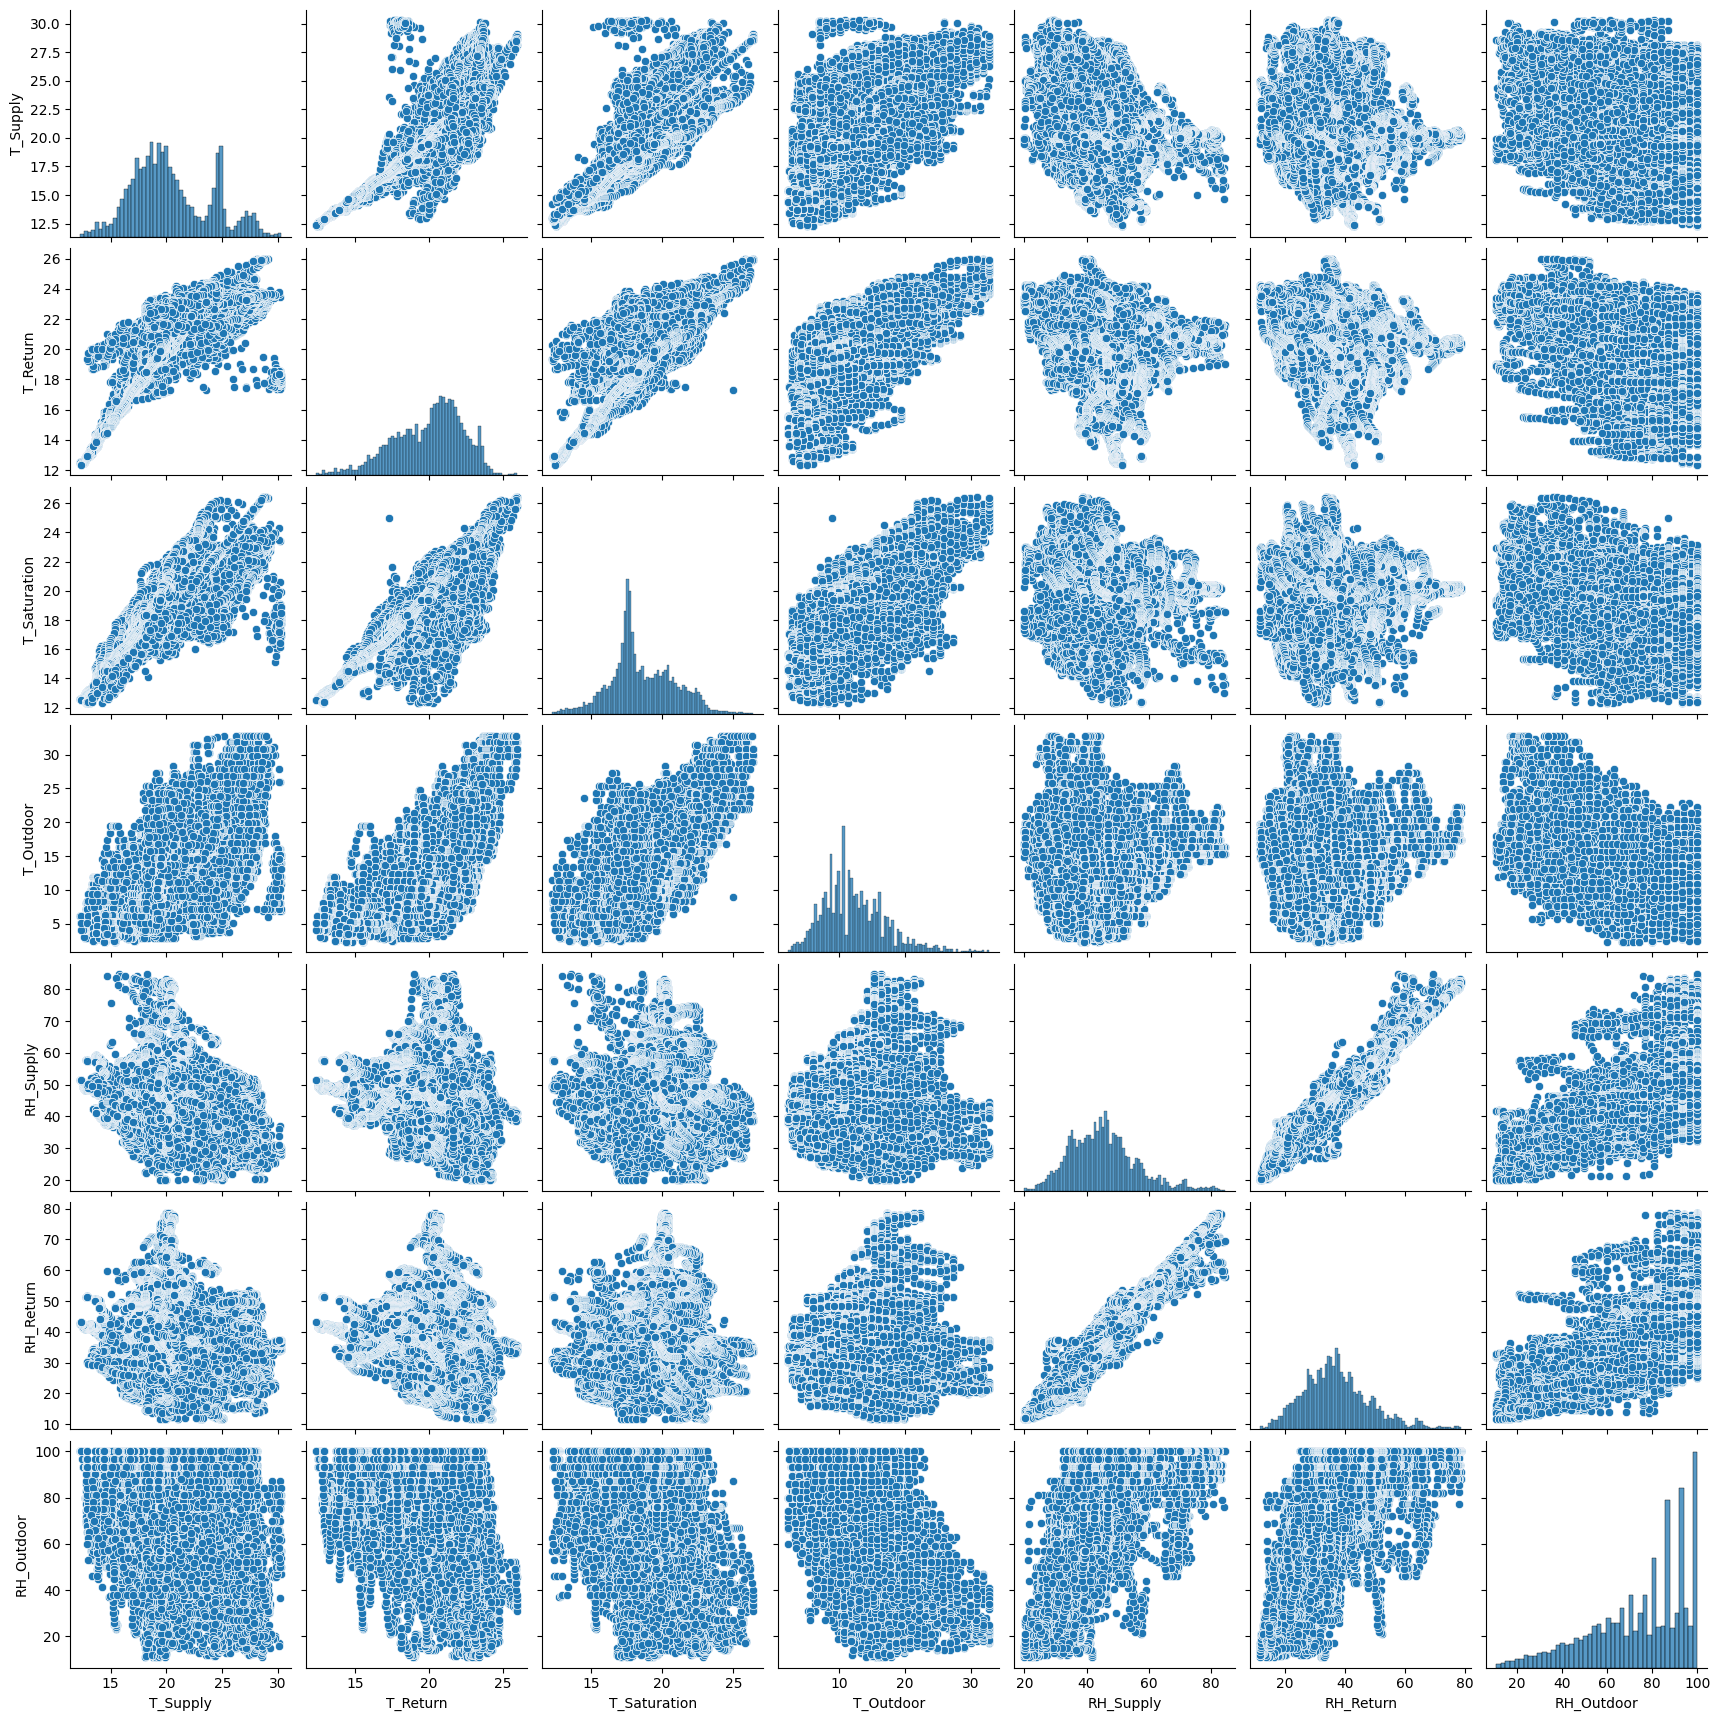

In [7]:
df_num = df[['T_Supply', 'T_Return', 'T_Saturation',
             'T_Outdoor', 'RH_Supply', 'RH_Return', 'RH_Outdoor']]
sns.pairplot(df_num)
plt.show()

In [8]:
df.sample(10)

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
20581,2020-11-22 09:15:00+01:00,17.385000,17.449999,22.5,17.260000,5.900000,43.459999,33.369999,81.0,0.0,0.000
20916,2020-11-25 21:00:00+01:00,18.799999,19.184999,22.5,19.820000,9.100000,42.180000,32.320000,78.0,0.0,0.000
17431,2020-10-20 13:45:00+02:00,21.605000,21.295000,22.5,19.740000,15.300000,56.169998,49.250000,88.0,12.0,5.280
11850,2020-02-15 10:30:00+01:00,24.980000,21.699999,22.5,18.000000,10.900000,30.469999,23.430000,60.0,13.0,5.088
9802,2020-01-25 02:30:00+01:00,17.260000,17.195000,22.5,17.340000,8.200000,42.459999,34.079998,81.0,0.0,0.000
13557,2020-03-10 05:15:00+01:00,17.914999,17.830000,22.5,17.840000,9.900000,45.090000,36.860001,56.0,0.0,0.000
7337,2019-12-30 10:15:00+01:00,24.740000,20.334999,22.5,17.699999,9.400000,36.340000,32.549999,100.0,14.0,4.788
32026,2021-03-24 14:30:00+01:00,21.900000,23.994999,21.5,20.219999,24.799999,35.779999,22.740000,33.0,13.0,5.172
4475,2019-11-30 14:45:00+01:00,25.279999,22.639999,22.5,18.160000,18.600000,34.799999,30.160000,42.0,13.0,4.908
25531,2021-01-15 22:45:00+01:00,17.375000,19.814999,22.5,15.559999,5.800000,40.969997,28.160000,80.0,12.0,4.860


# Limpieza de datos

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'].str[0:-6])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888 entries, 0 to 33887
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     33888 non-null  datetime64[ns]
 1   T_Supply      33888 non-null  float64       
 2   T_Return      33888 non-null  float64       
 3   SP_Return     33888 non-null  float64       
 4   T_Saturation  33888 non-null  float64       
 5   T_Outdoor     33888 non-null  float64       
 6   RH_Supply     33888 non-null  float64       
 7   RH_Return     33888 non-null  float64       
 8   RH_Outdoor    33888 non-null  float64       
 9   Energy        33888 non-null  float64       
 10  Power         33888 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 2.8 MB
None


,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
0,2019-10-15 00:00:00,19.859999,20.469999,18.5,19.02,20.299999,71.110001,58.919998,79.5,0.0,0.0
1,2019-10-15 00:15:00,19.855000,20.430000,18.5,19.02,20.299999,71.320000,59.000000,82.0,0.0,0.0
2,2019-10-15 00:30:00,19.850000,20.410000,18.5,19.02,20.299999,71.470001,59.109997,79.5,0.0,0.0
3,2019-10-15 00:45:00,19.840000,20.379999,18.5,19.08,20.299999,71.439995,59.309998,77.0,0.0,0.0
4,2019-10-15 01:00:00,19.830000,20.350000,18.5,19.08,20.299999,71.580002,59.559998,79.5,0.0,0.0


## Feature Engineering

In [10]:

def saturation_vapor_pressure(T):
    # La ecuación de Antoine para calcular la presión de vapor de saturación
    # T debe estar en grados Celsius
    A = 8.07131
    B = 1730.63
    C = 233.426
    return 10 ** (A - (B / (C + T)))*0.133322  # este numero es para pasar de hmmg a kpa


def specific_humidity(RH, T, P_atm=101.325):
    P_sat = saturation_vapor_pressure(T)                # Calcular la presión de vapor de saturación en kPa
    RH = RH/100                                         # pasar la humedad relativa de porcentaje a fracción
    return 0.622 * (RH * P_sat) / (P_atm - RH * P_sat)  # Calcular la humedad específica


def calculate_enthalpy(T, RH, P=101.325):
    c_p = 1.005                           # Calor específico del aire a presión constante en kJ/kg°C
    h_vap = 2501                          # Entalpía de vaporización del agua en kJ/kg
    w = specific_humidity(RH, T, P)       # Calcular la humedad específica
    h = c_p * (T) + w * h_vap               # Calcular la entalpía en kJ/kg
    return h


def delta_h(df):
    h_out = calculate_enthalpy(T= df['T_Outdoor'], RH= df['RH_Outdoor'])   # entalpia out
    h_sup = calculate_enthalpy(T= df['T_Supply'], RH= df['RH_Supply'])   # entalpia supply
    return h_sup-h_out


def calculate_wet_bulb_temperature(df):
    RH = df['RH_Outdoor'] / 100  # Convertir la humedad relativa a una fracción
    Twb = (df['T_Outdoor'] * np.arctan(0.151977 * np.sqrt(RH + 8.313659)) +
           np.arctan(df['T_Outdoor'] + RH) - np.arctan(RH - 1.676331) +
           0.00391838 * RH**1.5 * np.arctan(0.023101 * RH) - 4.686035)
    return Twb


def calculate_KPI(df):

    from sklearn.linear_model import HuberRegressor
    
    Delta_h = delta_h(df)                                    # Calcular la diferencia de entalpía como un vector
    T_wb_out = calculate_wet_bulb_temperature(df)            # Calcular la temperatura de bulbo húmedo como un vector
    huber = HuberRegressor()                                 # Crear el regresor de Huber y ajustarlo con los vectores creados
    huber.fit(T_wb_out.values.reshape(-1, 1), Delta_h)
    D_hat_h = huber.predict(T_wb_out.values.reshape(-1, 1))  # Predecir la entalpía ajustada a la línea de mejor ajuste con el regresor de Huber
    KPI = Delta_h / D_hat_h                                  # Calcular el KPI como un vector y no como una columna en el DataFrame
    
    return KPI                       # Devolver el vector KPI

df['delta_h'] = delta_h(df)
df['KPI'] = calculate_KPI(df)
t_wb_out = calculate_wet_bulb_temperature(df)
df['T_wb_out'] = calculate_wet_bulb_temperature(df)

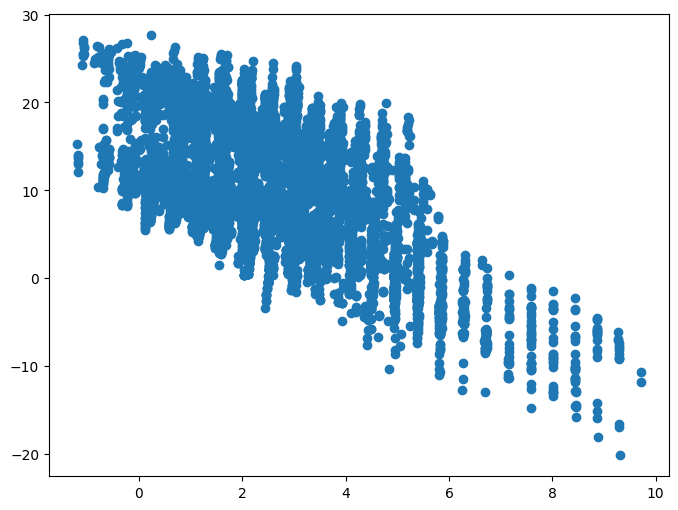

In [11]:
plt.figure(figsize= (8, 6))

plt.scatter(x= t_wb_out[:10000], y= df['delta_h'][:10000].values)
plt.show()

In [12]:
display(df.head())
display(df.tail())

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out
0,2019-10-15 00:00:00,19.859999,20.469999,18.5,19.02,20.299999,71.110001,58.919998,79.5,0.0,0.0,-4.330843,-1.845855,6.289753
1,2019-10-15 00:15:00,19.855000,20.430000,18.5,19.02,20.299999,71.320000,59.000000,82.0,0.0,0.0,-5.213420,-2.216344,6.286114
2,2019-10-15 00:30:00,19.850000,20.410000,18.5,19.02,20.299999,71.470001,59.109997,79.5,0.0,0.0,-4.225259,-1.800854,6.289753
3,2019-10-15 00:45:00,19.840000,20.379999,18.5,19.08,20.299999,71.439995,59.309998,77.0,0.0,0.0,-3.317295,-1.417131,6.293024
4,2019-10-15 01:00:00,19.830000,20.350000,18.5,19.08,20.299999,71.580002,59.559998,79.5,0.0,0.0,-4.237626,-1.806125,6.289753


,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out
33883,2021-04-14 22:45:00,19.539999,20.004999,20.5,19.619999,14.7,39.020000,27.930000,57.0,0.0,0.0,3.837602,0.611142,3.907501
33884,2021-04-14 23:00:00,19.520000,19.949999,20.5,19.539999,13.7,39.020000,28.090000,57.0,0.0,0.0,5.738965,0.821125,3.477608
33885,2021-04-14 23:15:00,19.430000,19.955000,20.5,19.420000,13.7,39.399998,27.930000,57.0,0.0,0.0,5.704928,0.816255,3.477608
33886,2021-04-14 23:30:00,19.420000,19.920000,20.5,19.400000,13.7,39.599998,28.039999,57.0,0.0,0.0,5.756475,0.823630,3.477608
33887,2021-04-14 23:45:00,19.420000,19.900000,20.5,19.400000,13.7,39.599998,28.150000,57.0,0.0,0.0,5.756475,0.823630,3.477608


In [13]:
df.sample(5)

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out
24184,2020-12-29 22:00:00,13.639999,13.670000,22.5,13.540000,5.9,49.309998,41.820000,87.0,0.0,0.000,7.214212,0.563985,-0.036793
4625,2019-12-02 04:15:00,17.270000,19.439999,22.5,15.740000,8.6,51.129997,40.790001,100.0,10.0,4.860,7.034352,0.645515,1.110505
25718,2021-01-17 21:30:00,15.870000,16.834999,22.5,14.080000,5.8,44.149998,33.329998,89.5,13.0,4.824,9.695466,0.752416,-0.093907
19913,2020-11-15 10:15:00,19.559999,19.240000,22.5,18.980000,11.9,53.709999,45.533333,87.0,0.0,0.000,7.879591,0.937721,2.621311
16169,2020-04-07 10:15:00,26.879999,21.959999,22.5,21.459999,18.1,34.540001,30.170000,42.0,8.0,2.592,14.316153,3.704204,5.369964


In [14]:
df.describe()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out
count,33888,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000
mean,2020-07-14 07:06:56.855524096,20.436936,19.994425,22.302290,18.580051,12.414164,45.433972,37.251636,73.803308,5.769196,2.308225,8.556169,1.109249,2.853741
min,2019-10-15 00:00:00,12.264999,12.344999,18.500000,12.300000,2.300000,19.939999,11.730000,11.000000,0.000000,0.000000,-30.258044,-460.383018,-1.764271
25%,2020-01-11 05:56:15,17.879999,18.389999,22.500000,17.260000,8.900000,37.709999,29.420000,60.000000,0.000000,0.000000,4.628432,0.623785,1.312206
50%,2020-10-15 11:52:30,19.785000,20.385000,22.500000,18.059999,11.800000,44.669998,36.230000,78.500000,0.000000,0.000000,8.623630,0.972413,2.555091
75%,2021-01-14 17:48:45,23.256249,21.699999,22.500000,20.180000,15.300000,51.180000,43.329998,93.000000,12.000000,4.980000,12.470193,1.547195,4.093220
max,2021-04-14 23:45:00,30.295000,25.990000,23.500000,26.400000,32.799999,84.699997,78.699997,100.000000,15.000000,5.316000,31.468454,2491.813094,11.596007
std,NaN,3.535683,2.357756,0.745301,2.237516,4.925918,10.765867,11.253552,21.116373,6.074394,2.432835,6.548068,16.263161,2.151066


# Feature extraction

In [15]:
df.set_index('Timestamp', inplace= True)

df_half_hourly = df.resample('30T').mean()
df_hourly = df.resample('H').mean()
print(df_hourly.info())
print(df_half_hourly.info())
df_hourly.sample(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13152 entries, 2019-10-15 00:00:00 to 2021-04-14 23:00:00
Freq: H
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   T_Supply      8472 non-null   float64
 1   T_Return      8472 non-null   float64
 2   SP_Return     8472 non-null   float64
 3   T_Saturation  8472 non-null   float64
 4   T_Outdoor     8472 non-null   float64
 5   RH_Supply     8472 non-null   float64
 6   RH_Return     8472 non-null   float64
 7   RH_Outdoor    8472 non-null   float64
 8   Energy        8472 non-null   float64
 9   Power         8472 non-null   float64
 10  delta_h       8472 non-null   float64
 11  KPI           8472 non-null   float64
 12  T_wb_out      8472 non-null   float64
dtypes: float64(13)
memory usage: 1.4 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2019-10-15 00:00:00 to 2021-04-14 23:30:00
Freq: 30T
Data columns (total 13 columns):
 # 

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out
Timestamp,,,,,,,,,,,,,
2020-07-21 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-14 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16 15:00:00,18.501249,18.416249,22.5,18.415000,16.900000,40.937499,32.035000,54.000,0.0,0.000,-1.016333,-0.250628,4.853789
2019-12-26 16:00:00,20.046250,19.696250,22.5,18.100000,13.300000,36.442498,27.295000,53.125,13.0,4.995,7.460473,1.023247,3.311318
2020-08-10 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25 20:00:00,19.448749,21.663749,22.5,17.520000,8.300000,25.375000,16.407499,35.750,12.5,4.995,14.027544,1.301821,1.184157
2020-11-03 22:00:00,21.470000,21.905000,22.5,22.435000,16.299999,63.699998,55.934998,94.000,0.0,0.000,3.451255,0.655164,4.520224
2020-10-10 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-10 20:00:00,18.890000,20.676249,22.5,18.515000,11.300000,51.742498,38.874999,90.750,3.0,0.000,6.302782,0.711313,2.344188


In [16]:
df_half_hourly.dropna(axis= 0, inplace= True)
df_half_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16944 entries, 2019-10-15 00:00:00 to 2021-04-14 23:30:00
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   T_Supply      16944 non-null  float64
 1   T_Return      16944 non-null  float64
 2   SP_Return     16944 non-null  float64
 3   T_Saturation  16944 non-null  float64
 4   T_Outdoor     16944 non-null  float64
 5   RH_Supply     16944 non-null  float64
 6   RH_Return     16944 non-null  float64
 7   RH_Outdoor    16944 non-null  float64
 8   Energy        16944 non-null  float64
 9   Power         16944 non-null  float64
 10  delta_h       16944 non-null  float64
 11  KPI           16944 non-null  float64
 12  T_wb_out      16944 non-null  float64
dtypes: float64(13)
memory usage: 1.8 MB


In [17]:
df_hourly.dropna(axis= 0, inplace= True)
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8472 entries, 2019-10-15 00:00:00 to 2021-04-14 23:00:00
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   T_Supply      8472 non-null   float64
 1   T_Return      8472 non-null   float64
 2   SP_Return     8472 non-null   float64
 3   T_Saturation  8472 non-null   float64
 4   T_Outdoor     8472 non-null   float64
 5   RH_Supply     8472 non-null   float64
 6   RH_Return     8472 non-null   float64
 7   RH_Outdoor    8472 non-null   float64
 8   Energy        8472 non-null   float64
 9   Power         8472 non-null   float64
 10  delta_h       8472 non-null   float64
 11  KPI           8472 non-null   float64
 12  T_wb_out      8472 non-null   float64
dtypes: float64(13)
memory usage: 926.6 KB


In [18]:
df_half_hourly.reset_index(inplace= True)
df_hourly.reset_index(inplace=True)
df_half_hourly.head()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out
0,2019-10-15 00:00:00,19.857499,20.450000,18.5,19.020000,20.299999,71.215001,58.959999,80.75,0.0,0.0,-4.772131,-2.031100,6.287933
1,2019-10-15 00:30:00,19.845000,20.395000,18.5,19.050000,20.299999,71.454998,59.209998,78.25,0.0,0.0,-3.771277,-1.608993,6.291388
2,2019-10-15 01:00:00,19.830000,20.335000,18.5,19.090000,20.299999,71.590000,59.609999,80.75,0.0,0.0,-4.707157,-2.003427,6.287933
3,2019-10-15 01:30:00,19.829999,20.304999,18.5,19.129999,19.299999,71.684998,59.829998,86.50,0.0,0.0,-3.871179,-1.256177,5.844707
4,2019-10-15 02:00:00,19.814999,20.265000,18.5,19.160000,19.299999,71.765000,60.055000,83.50,0.0,0.0,-2.814665,-0.916121,5.850462


In [19]:
# Extraer mes, día del mes y hora del día
df_hourly['month'] = df_hourly['Timestamp'].dt.month
df_hourly['day'] = df_hourly['Timestamp'].dt.day
df_hourly['hour'] = df_hourly['Timestamp'].dt.hour

df_hourly.set_index('Timestamp', inplace=True)
df_hourly.sample(10)

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour
Timestamp,,,,,,,,,,,,,,,,
2019-10-17 08:00:00,19.259999,21.236249,18.5,17.610000,15.050000,64.524999,51.995000,85.000,7.25,2.934,3.992924,0.628356,4.001773,10,17,8
2020-01-03 19:00:00,24.445000,20.748749,22.5,17.404999,8.150000,36.100001,31.512499,89.250,12.50,5.001,18.588485,1.667373,0.960339,1,3,19
2020-04-03 08:00:00,24.677499,20.770000,22.5,17.525000,8.100000,34.745000,29.092499,76.125,12.25,5.016,20.712917,1.866992,0.991148,4,3,8
2019-11-04 12:00:00,21.048750,20.693749,22.5,19.934999,17.799999,57.479999,50.644999,79.500,6.25,2.511,0.311076,0.043428,5.208282,11,4,12
2020-01-18 17:00:00,17.972500,18.162499,22.5,19.134999,12.900000,48.347500,39.634998,67.375,0.00,0.000,5.020749,0.647095,3.111563,1,18,17
2020-12-13 22:00:00,15.377500,15.568750,22.5,15.485000,7.400000,50.344999,42.329999,83.250,0.00,0.000,8.378390,0.716848,0.652382,12,13,22
2020-11-28 07:00:00,18.577500,19.631249,22.5,16.800000,9.300000,44.320000,33.522498,87.750,12.25,4.836,8.100686,0.783958,1.476025,11,28,7
2019-10-21 08:00:00,19.969999,20.183750,22.5,20.039999,16.299999,73.080000,66.014999,97.750,0.00,0.000,2.024791,0.383268,4.507964,10,21,8
2020-03-27 14:00:00,24.782500,21.396249,22.5,17.770000,14.050000,38.932500,34.069999,78.250,12.50,5.085,10.211691,1.492645,3.585237,3,27,14


In [20]:
# Extraer mes, día del mes y hora del día
df_half_hourly['month'] = df_half_hourly['Timestamp'].dt.month
df_half_hourly['day'] = df_half_hourly['Timestamp'].dt.day
df_half_hourly['hour'] = df_half_hourly['Timestamp'].dt.hour

df_half_hourly.set_index('Timestamp', inplace=True)
df_half_hourly.sample(10)

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour
Timestamp,,,,,,,,,,,,,,,,
2021-04-08 12:30:00,18.300000,22.595000,21.5,17.299999,18.299999,26.559999,15.024999,21.25,12.5,4.980,1.719457,0.447301,5.445404,4,8,12
2021-02-15 17:00:00,19.739999,22.325000,22.5,17.920000,12.100000,28.929999,18.504999,26.50,12.0,4.974,12.186928,1.508296,2.825235,2,15,17
2021-03-24 10:00:00,19.717499,22.055000,21.5,17.670000,17.799999,36.619999,23.479999,47.75,12.5,5.130,-0.120164,-0.029462,5.241513,3,24,10
2020-12-15 15:00:00,21.795000,21.089999,22.5,17.559999,14.800000,40.220000,33.400000,61.00,12.0,4.866,7.410783,1.191858,3.944761,12,15,15
2019-12-17 08:00:00,21.907500,20.015000,22.5,18.070000,8.600000,48.319997,42.079998,100.00,13.0,4.932,15.705341,1.441217,1.110505,12,17,8
2020-02-15 19:30:00,19.657500,19.720000,22.5,20.319999,13.400000,38.779999,28.909999,61.00,0.0,0.000,5.525697,0.762877,3.341477,2,15,19
2020-03-15 09:30:00,19.000000,19.022499,22.5,19.399999,12.800000,51.484999,44.134998,76.00,0.0,0.000,6.373075,0.827875,3.048198,3,15,9
2020-01-07 05:00:00,15.635000,15.930000,22.5,16.000000,5.100000,46.955000,38.439999,94.75,0.0,0.000,10.631701,0.788180,-0.440975,1,7,5
2019-12-25 21:00:00,18.340000,19.002499,22.5,19.970000,10.600000,41.769998,31.070000,43.75,0.0,0.000,12.778430,1.395507,2.164663,12,25,21


In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import pandas as pd
# from scipy.stats import gaussian_kde

# start_date = '2019-12-15'
# end_date = '2020-02-15'

# print(len(df_hourly))
# df_h_2019_2020 = df_hourly.loc[start_date:end_date]
# print(len(df_h_2019_2020))
# df_h_2019_2020 = df_h_2019_2020[df_h_2019_2020['delta_h'] >=0]
# #Asumimos que df es tu DataFrame y ya contiene las columnas 'Twb_out' y 'Delta_h'
# print(len(df_h_2019_2020))
# #Calcula la densidad de los puntos
# x = df_h_2019_2020['T_wb_out']
# y = df_h_2019_2020['delta_h']
# xy = np.vstack([x, y])
# z = gaussian_kde(xy)(xy)

# #Crea el gráfico de dispersión
# fig, ax = plt.subplots()
# scatter = ax.scatter(x, y, c=z, s=50, cmap='viridis')

# #Añade la barra de color
# cbar = plt.colorbar(scatter)
# cbar.set_label('Density')

# #Añade la línea de regresión
# sns.regplot(x='T_wb_out', y='delta_h', data=df_h_2019_2020, scatter=False, ax=ax, color='red')

# #Añade etiquetas y título si es necesario
# ax.set_xlabel('Twb, out [°C]')
# ax.set_ylabel('Δh [kJ/kg dry air]')
# ax.set_title('Scatter plot with regression line and density')

# #Muestra el gráfico
# plt.show()

In [22]:
# df_hourly.hist(figsize=(15, 10), bins= 20)
# plt.show()

In [23]:
# df_num_h = df_hourly[['T_Supply', 'T_Return', 'T_Saturation',
#                       'T_Outdoor', 'RH_Supply', 'RH_Return', 'RH_Outdoor']]
# sns.pairplot(df_num_h)
# plt.show()

# Data Processing

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
# partición externa (mantenemos el orden por que puede ser interesante para inferencia)

X_train_full, X_test = train_test_split(df_half_hourly, shuffle= False, test_size=0.1)

print('Particion Externa de datos: ')
print(X_train_full.shape)
print(X_test.shape)
print('\n')
# particion interna: aqui si mezclamos los datos

X_train, X_val = train_test_split(X_train_full, random_state=42, shuffle= False, test_size=0.25)

print('Particion Externa de datos: ')
print(X_train.shape)
print(X_val.shape)

Particion Externa de datos: 
(15249, 16)
(1695, 16)


Particion Externa de datos: 
(11436, 16)
(3813, 16)


In [26]:
X_train_full.head()

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour
Timestamp,,,,,,,,,,,,,,,,
2019-10-15 00:00:00,19.857499,20.450000,18.5,19.020000,20.299999,71.215001,58.959999,80.75,0.0,0.0,-4.772131,-2.031100,6.287933,10,15,0
2019-10-15 00:30:00,19.845000,20.395000,18.5,19.050000,20.299999,71.454998,59.209998,78.25,0.0,0.0,-3.771277,-1.608993,6.291388,10,15,0
2019-10-15 01:00:00,19.830000,20.335000,18.5,19.090000,20.299999,71.590000,59.609999,80.75,0.0,0.0,-4.707157,-2.003427,6.287933,10,15,1
2019-10-15 01:30:00,19.829999,20.304999,18.5,19.129999,19.299999,71.684998,59.829998,86.50,0.0,0.0,-3.871179,-1.256177,5.844707,10,15,1
2019-10-15 02:00:00,19.814999,20.265000,18.5,19.160000,19.299999,71.765000,60.055000,83.50,0.0,0.0,-2.814665,-0.916121,5.850462,10,15,2


In [27]:
X_test.tail()

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour
Timestamp,,,,,,,,,,,,,,,,
2021-04-14 21:30:00,19.270000,20.680000,21.5,18.899999,14.7,39.379999,26.659999,54.00,0.0,0.0,4.242619,0.676321,3.911320,4,14,21
2021-04-14 22:00:00,19.479999,20.220000,20.5,19.350000,14.7,39.095000,27.649998,56.25,0.0,0.0,3.947589,0.628826,3.908482,4,14,22
2021-04-14 22:30:00,19.539999,20.032499,20.5,19.570000,14.7,39.020000,27.849999,57.00,0.0,0.0,3.837602,0.611142,3.907501,4,14,22
2021-04-14 23:00:00,19.475000,19.952499,20.5,19.480000,13.7,39.209999,28.010000,57.00,0.0,0.0,5.721947,0.818690,3.477608,4,14,23
2021-04-14 23:30:00,19.420000,19.910000,20.5,19.400000,13.7,39.599998,28.095000,57.00,0.0,0.0,5.756475,0.823630,3.477608,4,14,23


## Guardamos los datos procesados

In [28]:
data_path = '../data/Anomaly_detection/processed_data/'

# X_train.to_csv(path + 'HVAC_train_processed.csv')
# X_test.to_csv(path + 'HVAC_test_processed.csv')

from load_store_utils import guardar_datos_procesados

guardar_datos_procesados(data= X_train_full, name= 'HVAC_train_full_processed.csv', ruta_datos= data_path)
guardar_datos_procesados(data= X_test, name= 'HVAC_test_processeded.csv', ruta_datos=data_path)

Los datos HVAC_train_full_processed.csv ya existen en el directorio ../data/Anomaly_detection/processed_data/.
Los datos HVAC_test_processeded.csv ya existen en el directorio ../data/Anomaly_detection/processed_data/.


False

## Escalado de datos

In [29]:
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)
X_val_scl = scaler.transform(X_val)

X_train_scl_df = pd.DataFrame(X_train_scl, columns= scaler.feature_names_in_, index= X_train.index)
X_val_scl_df = pd.DataFrame(X_val_scl, columns= scaler.feature_names_in_, index= X_val.index)

In [30]:
X_train_scl_df.head()

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour
Timestamp,,,,,,,,,,,,,,,,
2019-10-15 00:00:00,-0.369823,0.162487,-7.313212,0.039134,1.604261,2.087757,1.649925,0.236314,-0.884262,-0.884357,-2.038909,-0.438769,1.604110,0.575238,-0.106611,-1.659308
2019-10-15 00:30:00,-0.373272,0.137135,-7.313212,0.054112,1.604261,2.108029,1.670976,0.115883,-0.884262,-0.884357,-1.892681,-0.380628,1.605798,0.575238,-0.106611,-1.659308
2019-10-15 01:00:00,-0.377411,0.109478,-7.313212,0.074084,1.604261,2.119433,1.704659,0.236314,-0.884262,-0.884357,-2.029416,-0.434958,1.604110,0.575238,-0.106611,-1.514902
2019-10-15 01:30:00,-0.377411,0.095649,-7.313212,0.094055,1.391327,2.127458,1.723185,0.513304,-0.884262,-0.884357,-1.907277,-0.332031,1.387522,0.575238,-0.106611,-1.514902
2019-10-15 02:00:00,-0.381550,0.077212,-7.313212,0.109035,1.391327,2.134216,1.742132,0.368788,-0.884262,-0.884357,-1.752917,-0.285191,1.390334,0.575238,-0.106611,-1.370496


## Guardamos el scaler

In [31]:
from load_store_utils import guardar_modelo

name=  'scaler_trained.pickle'
path = './models/anomaly_detection/'

guardar_modelo(scaler, name= name, ruta_modelo= path)

Modelo guardado con éxito en ./models/anomaly_detection/scaler_trained.pickle


True

# Unsupervised machine learning

In [32]:
# novelti detection adn outlier detection
from sklearn.ensemble import IsolationForest      # outlier detection

## Isolation Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

### Train

In [33]:
IF = IsolationForest(n_estimators=100, contamination=0.05)
#IF.fit(X_train_scl_df)

IF_train_labels =  IF.fit_predict(X_train_scl_df)
X_train_w_labels = X_train.copy()
X_train_w_labels['IF_prediction'] = IF_train_labels

X_train_w_labels.head()

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour,IF_prediction
Timestamp,,,,,,,,,,,,,,,,,
2019-10-15 00:00:00,19.857499,20.450000,18.5,19.020000,20.299999,71.215001,58.959999,80.75,0.0,0.0,-4.772131,-2.031100,6.287933,10,15,0,-1
2019-10-15 00:30:00,19.845000,20.395000,18.5,19.050000,20.299999,71.454998,59.209998,78.25,0.0,0.0,-3.771277,-1.608993,6.291388,10,15,0,-1
2019-10-15 01:00:00,19.830000,20.335000,18.5,19.090000,20.299999,71.590000,59.609999,80.75,0.0,0.0,-4.707157,-2.003427,6.287933,10,15,1,-1
2019-10-15 01:30:00,19.829999,20.304999,18.5,19.129999,19.299999,71.684998,59.829998,86.50,0.0,0.0,-3.871179,-1.256177,5.844707,10,15,1,-1
2019-10-15 02:00:00,19.814999,20.265000,18.5,19.160000,19.299999,71.765000,60.055000,83.50,0.0,0.0,-2.814665,-0.916121,5.850462,10,15,2,-1


In [34]:
X_train_w_labels['IF_prediction'].value_counts()

IF_prediction
 1    10864
-1      572
Name: count, dtype: int64

In [35]:
X_train_w_labels[X_train_w_labels['IF_prediction'] == -1].sample(10)

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour,IF_prediction
Timestamp,,,,,,,,,,,,,,,,,
2020-04-10 21:00:00,26.697499,24.240000,23.5,25.169999,25.799999,28.180000,20.570000,24.00,8.0,2.580,3.857636,-2.627863,8.599982,4,10,21,-1
2020-02-11 15:30:00,28.197499,23.522499,23.0,22.990000,19.000000,28.530000,22.024999,19.75,6.5,2.682,19.459997,5.975163,5.738239,2,11,15,-1
2020-02-20 19:00:00,27.189999,23.460000,23.5,22.520000,13.800000,28.059998,20.134999,32.00,6.5,2.658,21.345315,3.103730,3.545349,2,20,19,-1
2020-04-08 21:00:00,26.092500,23.467500,23.5,23.710000,23.299999,29.329999,21.299999,28.25,7.5,2.580,5.638504,-22.136274,7.557729,4,8,21,-1
2020-02-11 19:30:00,27.977500,23.317499,23.5,22.649999,16.000000,28.579999,22.100000,19.25,6.0,2.652,23.362666,4.374956,4.476424,2,11,19,-1
2020-03-11 16:00:00,29.129999,23.489999,22.5,23.020000,25.900000,32.414999,27.524999,31.00,12.5,5.148,7.517866,-4.809262,8.657662,3,11,16,-1
2020-11-25 08:00:00,29.026250,19.002499,22.5,18.879999,6.900000,28.430000,32.050000,75.00,4.0,0.060,28.414330,2.374471,0.462835,11,25,8,-1
2019-10-17 16:30:00,19.059999,22.270000,18.5,16.440000,26.799999,67.104996,51.289997,56.00,13.5,5.274,-15.625874,6.979250,9.081581,10,17,16,-1
2020-02-23 13:30:00,18.597499,18.447500,22.5,18.359999,21.299999,42.520000,33.994999,60.00,0.0,0.000,-12.259590,-8.108961,6.734068,2,23,13,-1


In [36]:
predictions = IF.predict(X_val_scl_df.iloc[-100:,:].values)
print(predictions)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\TFM_transformer_agents\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


### Validación

In [37]:
IF_val_labels =  IF.predict(X_val_scl_df)
X_val_w_labels = X_val.copy()
X_val_w_labels['IF_prediction'] = IF_val_labels
print(X_val_w_labels['IF_prediction'].value_counts())
X_val_w_labels.head()

IF_prediction
 1    3605
-1     208
Name: count, dtype: int64


,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour,IF_prediction
Timestamp,,,,,,,,,,,,,,,,,
2020-12-16 06:00:00,17.100000,17.822499,22.5,16.379999,8.8,50.420000,39.784998,93.0,5.0,2.412,7.287693,0.681362,1.232553,12,16,6,1
2020-12-16 06:30:00,18.034999,18.947499,22.5,16.270000,10.8,49.694998,38.189999,93.0,12.0,4.842,4.535027,0.490918,2.115600,12,16,6,1
2020-12-16 07:00:00,18.649999,18.872499,22.5,16.210000,10.8,49.049999,38.799999,88.5,12.0,4.836,6.478316,0.703661,2.133454,12,16,7,1
2020-12-16 07:30:00,19.880000,19.025000,22.5,16.229999,10.8,46.834999,39.029999,87.0,12.0,4.776,8.530475,0.927341,2.139218,12,16,7,1
2020-12-16 08:00:00,20.567500,19.320000,22.5,16.360000,10.8,45.914999,38.899999,87.0,12.0,4.824,9.610967,1.044800,2.139218,12,16,8,1


### Guardar modelo

In [38]:
from load_store_utils import guardar_modelo

guardar_modelo(IF, name='IF_trained.pickle', ruta_modelo='./models/anomaly_detection/')

Modelo guardado con éxito en ./models/anomaly_detection/IF_trained.pickle


True

In [39]:
import joblib
IF_loaded = joblib.load('./models/anomaly_detection/IF_trained.pickle')

IF_loaded

IsolationForest(contamination=0.05)

## Local Outlier Factor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor

### Train

In [40]:
from sklearn.neighbors import LocalOutlierFactor

In [41]:
LOF = LocalOutlierFactor(novelty= False, n_neighbors= 40, algorithm='auto', metric='minkowski')
LOF_train_labels = LOF.fit_predict(X_train_scl_df)

X_train_w_labels['LOF_prediction'] = LOF_train_labels
#X_train_w_labels.head()

In [42]:
print(X_train_w_labels['LOF_prediction'].value_counts())
X_train_w_labels[X_train_w_labels['LOF_prediction']==-1].sample(10)

LOF_prediction
 1    11261
-1      175
Name: count, dtype: int64


,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour,IF_prediction,LOF_prediction
Timestamp,,,,,,,,,,,,,,,,,,
2019-11-27 19:00:00,27.805000,23.134999,23.5,22.399999,13.6,46.469997,45.959997,94.00,6.0,2.502,18.628989,2.581662,3.340276,11,27,19,1,-1
2020-12-10 06:00:00,16.235000,16.905000,22.5,15.500000,8.6,52.564999,44.079998,91.50,4.0,2.460,6.868177,0.634037,1.150521,12,10,6,1,-1
2020-04-08 12:00:00,25.559999,22.460000,22.5,19.280000,24.4,31.104999,24.919999,23.75,12.5,5.082,5.759099,-20.081328,8.011290,4,8,12,1,-1
2020-02-03 17:30:00,28.104999,23.414999,23.5,24.139999,24.9,29.265000,26.905000,14.75,12.5,5.172,13.306778,-16.449140,8.200814,2,3,17,-1,-1
2020-11-19 20:00:00,25.877499,22.752499,23.0,21.459999,12.9,42.739998,38.705000,91.50,6.5,2.418,14.097233,1.829630,3.042852,11,19,20,1,-1
2020-01-03 20:00:00,22.999999,20.020000,22.5,18.110000,8.4,38.099998,32.640000,88.50,6.0,0.000,16.186190,1.477174,1.074953,1,3,20,1,-1
2020-03-21 18:00:00,21.492500,22.092500,22.5,22.530000,24.1,42.205000,31.464999,42.00,0.0,0.000,-5.436974,-188.287258,7.915932,3,21,18,-1,-1
2020-02-13 20:00:00,23.445000,22.192499,22.5,18.170001,11.9,31.580000,21.774999,55.00,6.5,2.568,13.882629,1.680107,2.705609,2,13,20,1,-1
2020-02-03 14:30:00,30.100000,23.550000,23.0,23.440000,25.9,36.595000,36.344999,26.75,12.5,5.142,14.687553,-9.581970,8.646626,2,3,14,-1,-1


### validación

In [43]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings('ignore')

In [44]:
LOF = LocalOutlierFactor(novelty= True, n_neighbors= 40, algorithm='auto', metric='minkowski')
LOF.fit(X_train_scl_df)
LOF_val_labels = LOF.predict(X_val_scl_df)

X_val_w_labels['LOF_prediction'] = LOF_val_labels
X_val_w_labels.head()

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour,IF_prediction,LOF_prediction
Timestamp,,,,,,,,,,,,,,,,,,
2020-12-16 06:00:00,17.100000,17.822499,22.5,16.379999,8.8,50.420000,39.784998,93.0,5.0,2.412,7.287693,0.681362,1.232553,12,16,6,1,1
2020-12-16 06:30:00,18.034999,18.947499,22.5,16.270000,10.8,49.694998,38.189999,93.0,12.0,4.842,4.535027,0.490918,2.115600,12,16,6,1,1
2020-12-16 07:00:00,18.649999,18.872499,22.5,16.210000,10.8,49.049999,38.799999,88.5,12.0,4.836,6.478316,0.703661,2.133454,12,16,7,1,1
2020-12-16 07:30:00,19.880000,19.025000,22.5,16.229999,10.8,46.834999,39.029999,87.0,12.0,4.776,8.530475,0.927341,2.139218,12,16,7,1,1
2020-12-16 08:00:00,20.567500,19.320000,22.5,16.360000,10.8,45.914999,38.899999,87.0,12.0,4.824,9.610967,1.044800,2.139218,12,16,8,1,1


In [45]:
# print(X_train_scl_df.columns == X_val_scl_df.columns)
#X_val_scl_df.columns


In [46]:
print(X_val_w_labels['LOF_prediction'].value_counts())
X_val_w_labels[X_val_w_labels['LOF_prediction']==-1].sample(10)

LOF_prediction
 1    2309
-1    1504
Name: count, dtype: int64


,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour,IF_prediction,LOF_prediction
Timestamp,,,,,,,,,,,,,,,,,,
2021-01-29 13:30:00,19.817500,22.334999,22.5,17.559999,11.900000,41.595000,27.629999,66.00,12.5,5.112,8.605060,1.024292,2.682284,1,29,13,1,-1
2021-01-01 16:00:00,12.595000,12.544999,22.5,12.660000,5.100000,49.929998,41.750000,98.25,0.0,0.000,5.466117,0.405278,-0.458643,1,1,16,-1,-1
2021-01-12 05:00:00,13.740000,14.067500,22.5,13.729999,3.800000,41.910000,33.200001,78.50,0.0,0.000,10.467147,0.730449,-0.968610,1,12,5,1,-1
2021-01-15 19:30:00,18.030000,21.169999,22.5,16.200000,6.800000,38.959999,26.350000,81.00,12.0,4.932,11.397285,0.943527,0.394480,1,15,19,1,-1
2021-01-21 19:30:00,18.540000,21.689999,22.5,16.709999,8.400000,44.180000,30.530000,93.00,12.0,4.968,8.946981,0.814189,1.055059,1,21,19,1,-1
2021-01-16 15:30:00,18.705000,19.867499,22.5,16.799999,11.800000,37.654999,26.610000,64.00,12.0,4.860,5.813539,0.694956,2.644050,1,16,15,1,-1
2021-02-08 15:00:00,19.495000,22.277499,22.5,17.149999,16.799999,44.465000,34.074999,54.00,12.5,5.076,2.308194,0.466561,4.811037,2,8,15,1,-1
2021-03-04 04:30:00,19.340000,19.737499,19.5,19.129999,10.300000,42.614998,33.090001,79.50,0.0,0.000,8.495094,0.892685,1.946724,3,4,4,1,-1
2021-02-27 15:00:00,21.792499,21.300000,19.5,20.529999,19.100000,41.994999,34.980000,34.00,6.5,2.562,8.072441,2.570218,5.791668,2,27,15,1,-1


### Guardar modelo

In [47]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
guardar_modelo(LOF, name= 'LOF_trained.pickle', ruta_modelo= path)

Modelo guardado con éxito en ./models/anomaly_detection/LOF_trained.pickle


True

## Elliptic Envelope

https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html

### Train

In [48]:
from sklearn.covariance import EllipticEnvelope

In [49]:
EE = EllipticEnvelope(contamination=0.05, store_precision=True, random_state=42, support_fraction=1)
EE_train_labels = EE.fit_predict(X_train_scl_df)

X_train_w_labels['EE_prediction'] = EE_train_labels
print(X_train_w_labels['EE_prediction'].value_counts())

EE_prediction
 1    10864
-1      572
Name: count, dtype: int64


In [50]:
X_train_w_labels[X_train_w_labels['EE_prediction']==-1].sample(5)

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour,IF_prediction,LOF_prediction,EE_prediction
Timestamp,,,,,,,,,,,,,,,,,,,
2019-10-17 14:00:00,19.485000,21.722499,18.5,16.769999,23.299999,64.034999,50.644998,64.00,13.5,5.262,-9.914217,7.874123,7.590689,10,17,14,-1,1,-1
2020-04-08 18:30:00,27.184999,23.487499,23.5,23.860000,29.299999,27.709999,21.285000,23.75,13.0,5.160,-1.630499,0.420713,10.067470,4,8,18,-1,1,-1
2019-10-17 04:30:00,18.080000,18.979999,18.5,18.820000,14.300000,68.715000,57.180000,83.50,0.0,0.000,4.825031,0.725036,3.679734,10,17,4,1,1,-1
2020-04-14 17:00:00,27.397500,24.705000,23.5,25.110000,31.799999,34.625000,28.210000,23.50,12.5,5.142,-1.941707,0.345462,11.114866,4,14,17,-1,1,-1
2019-10-17 16:30:00,19.059999,22.270000,18.5,16.440000,26.799999,67.104996,51.289997,56.00,13.5,5.274,-15.625874,6.979250,9.081581,10,17,16,-1,1,-1


### Validación

In [51]:
EE_val_labels = EE.predict(X_val_scl_df)

X_val_w_labels['EE_prediction'] = EE_val_labels
print(X_val_w_labels['EE_prediction'].value_counts())
X_val_w_labels[X_val_w_labels['EE_prediction']==-1].sample(5)

EE_prediction
 1    3309
-1     504
Name: count, dtype: int64


,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour,IF_prediction,LOF_prediction,EE_prediction
Timestamp,,,,,,,,,,,,,,,,,,,
2021-02-27 02:30:00,19.959999,20.477499,19.5,20.269999,13.5,45.920000,36.324999,65.00,0.0,0.000,7.528179,1.052199,3.377267,2,27,2,1,-1,-1
2021-02-27 04:30:00,19.912500,20.319999,19.5,20.090000,12.5,45.849998,36.450001,69.75,0.0,0.000,8.333604,1.056685,2.933944,2,27,4,1,-1,-1
2021-03-05 09:00:00,19.772499,20.905000,19.5,18.160000,9.3,40.774999,29.955000,68.50,13.0,5.226,12.687701,1.246004,1.543909,3,5,9,1,-1,-1
2021-03-04 05:30:00,19.257500,19.664999,19.5,19.090000,10.3,42.500000,33.004999,75.00,0.0,0.000,9.173052,0.966375,1.961529,3,4,5,1,-1,-1
2021-03-06 12:30:00,18.682500,20.850000,19.5,17.649999,9.1,50.634998,37.650000,87.00,12.5,5.046,10.991301,1.053396,1.391012,3,6,12,1,-1,-1


### Guardar modelo

In [52]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
name = 'EE_trained.pickle'

guardar_modelo(EE, name= name, ruta_modelo= path)

Modelo guardado con éxito en ./models/anomaly_detection/EE_trained.pickle


True

## OneClassSVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

El One-Class SVM intenta encontrar un límite en el espacio de características que mejor separa los datos de entrenamiento (considerados como "normales") del origen (o de otros puntos considerados como "anómalos"). El objetivo es encapsular la mayoría de los datos de entrenamiento dentro de este límite, excluyendo las anomalías.

### Train y validación

In [53]:
from sklearn.svm import OneClassSVM

In [54]:
for nu in np.linspace(start= 0.01, stop= 0.1, num= 10):
    OCSVM = OneClassSVM(kernel= 'rbf', nu= nu, gamma= 'scale')
    OCSVM_train_predictions = OCSVM.fit_predict(X_train_scl_df)
    OCSVM_val_predictions = OCSVM.predict(X_val_scl_df)
    print(f'for nu: {round(nu, 2)} the number of outliers: ')
    print(np.unique(OCSVM_train_predictions, return_counts=True))
    print(np.unique(OCSVM_val_predictions, return_counts=True), '\n')

for nu: 0.01 the number of outliers: 
(array([-1,  1], dtype=int64), array([  119, 11317], dtype=int64))
(array([-1,  1], dtype=int64), array([1235, 2578], dtype=int64)) 



for nu: 0.02 the number of outliers: 
(array([-1,  1], dtype=int64), array([  233, 11203], dtype=int64))
(array([-1,  1], dtype=int64), array([1320, 2493], dtype=int64)) 

for nu: 0.03 the number of outliers: 
(array([-1,  1], dtype=int64), array([  344, 11092], dtype=int64))
(array([-1,  1], dtype=int64), array([1413, 2400], dtype=int64)) 

for nu: 0.04 the number of outliers: 
(array([-1,  1], dtype=int64), array([  460, 10976], dtype=int64))
(array([-1,  1], dtype=int64), array([1444, 2369], dtype=int64)) 

for nu: 0.05 the number of outliers: 
(array([-1,  1], dtype=int64), array([  568, 10868], dtype=int64))
(array([-1,  1], dtype=int64), array([1485, 2328], dtype=int64)) 

for nu: 0.06 the number of outliers: 
(array([-1,  1], dtype=int64), array([  688, 10748], dtype=int64))
(array([-1,  1], dtype=int64), array([1550, 2263], dtype=int64)) 

for nu: 0.07 the number of outliers: 
(array([-1,  1], dtype=int64), array([  801, 10635], dtype=int64))
(array([-1,  1], dtype=int64), arra

In [55]:
OCSVM = OneClassSVM(kernel= 'rbf', nu= 0.01, gamma= 'scale')
OCSVM_train_predictions = OCSVM.fit_predict(X_train_scl_df)
OCSVM_val_predictions = OCSVM.predict(X_val_scl_df)

X_train_w_labels['OCSVM_prediction'] = OCSVM_train_predictions
X_val_w_labels['OCSVM_prediction'] = OCSVM_val_predictions

X_train_w_labels[X_train_w_labels['OCSVM_prediction']==-1].sample(10)

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour,IF_prediction,LOF_prediction,EE_prediction,OCSVM_prediction
Timestamp,,,,,,,,,,,,,,,,,,,,
2019-10-25 18:00:00,20.880000,20.832499,22.5,20.219999,23.299999,68.215001,63.624998,71.75,0.0,0.000,-8.293906,-41.523972,7.589897,10,25,18,-1,-1,-1,-1
2019-10-31 00:00:00,20.329999,20.649999,22.5,21.220000,13.300000,72.110001,66.390000,100.00,0.0,0.000,10.150499,1.358601,3.185583,10,31,0,1,1,1,-1
2020-02-24 14:00:00,26.890000,22.934999,22.5,20.430000,24.400000,40.879999,37.200001,32.50,13.0,5.238,9.625206,-35.499255,8.028376,2,24,14,1,-1,-1,-1
2020-11-05 15:30:00,23.402499,24.159999,23.5,21.190000,24.150001,58.955000,49.784998,67.00,12.5,5.166,-5.838255,14.544702,7.955533,11,5,15,-1,-1,-1,-1
2019-10-25 18:30:00,20.890000,20.854999,22.5,20.270000,23.299999,68.474998,63.269998,76.00,0.0,0.000,-10.106117,-49.841931,7.588057,10,25,18,-1,-1,-1,-1
2019-10-30 23:00:00,20.397499,20.820000,22.5,21.460000,13.300000,72.360000,65.964996,100.00,0.0,0.000,10.427175,1.395632,3.185583,10,30,23,1,1,1,-1
2019-10-16 01:30:00,18.902500,19.569999,18.5,18.610000,16.299999,82.449997,70.659996,94.00,0.0,0.000,3.554630,0.674788,4.520224,10,16,1,1,1,-1,-1
2020-11-27 08:30:00,30.149999,17.830000,22.5,18.790000,7.100000,29.674999,35.904999,82.50,0.5,0.228,30.056748,2.532487,0.522241,11,27,8,-1,1,-1,-1
2019-10-24 00:00:00,20.487499,20.652499,22.5,20.379999,17.299999,79.794998,76.959999,89.50,0.0,0.000,5.682297,1.255268,4.968733,10,24,0,1,1,1,-1


### Guardar modelo

In [56]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
name = 'OCSVM_trained.pickle'

guardar_modelo(OCSVM, name= name, ruta_modelo= path)

Modelo guardado con éxito en ./models/anomaly_detection/OCSVM_trained.pickle


True

## Gaussian mixtures

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

### Choosing the number of clusters

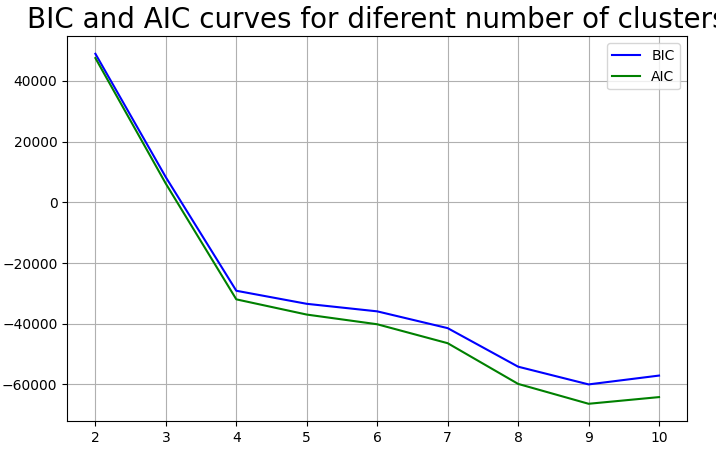

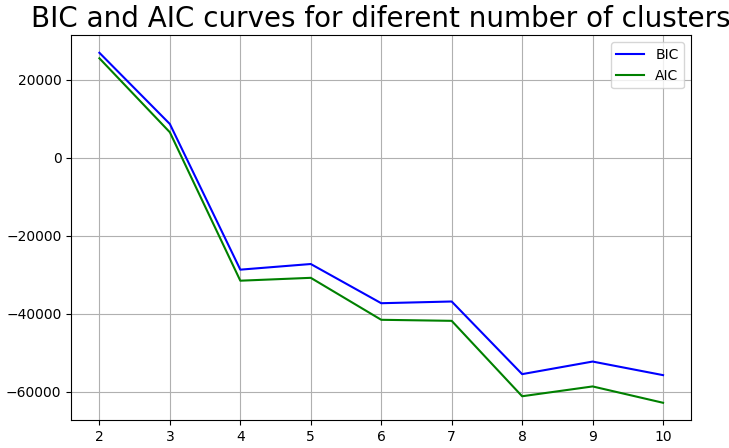

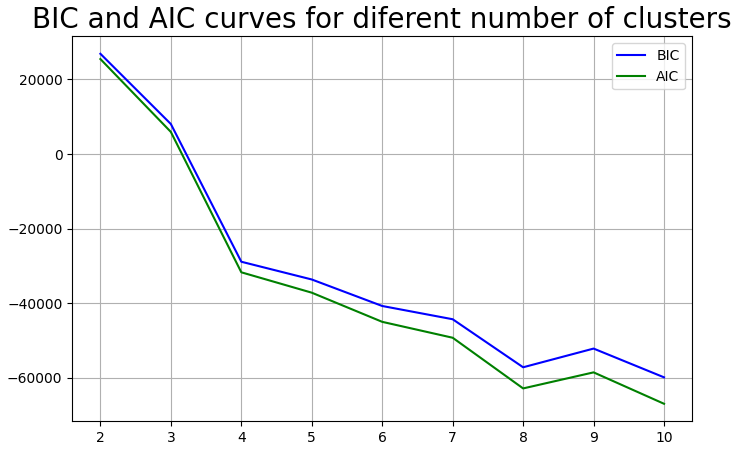

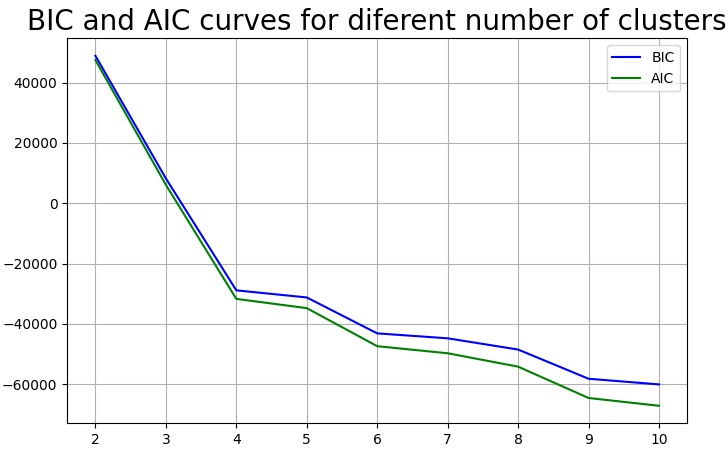

In [57]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

In [58]:
# for rs in range(10):
#     x = range(2, 11)
#     BIC = []
#     AIC = []
#     for cluster in x: 
#         GMM = GaussianMixture(n_components=cluster, n_init= 10, init_params= 'k-means++', random_state=rs)
#         GMM.fit(X_train_scl)
#         BIC.append(GMM.bic(X_train_scl))
#         AIC.append(GMM.aic(X_train_scl))
    
#     plt.figure(figsize= (8, 5))
#     plt.title('BIC and AIC curves for diferent number of clusters', fontsize= 20)
#     plt.plot(x, BIC, label= 'BIC', color= 'blue')
#     plt.plot(x, AIC, label= 'AIC', color= 'green')
#     plt.legend()
#     plt.grid()
#     plt.show()

In [59]:
# for rs in [0, 5, 17, 42]:
#     x = np.arange(3, 11)
#     print(rs)
#     for cluster in x: 
#         BGMM = BayesianGaussianMixture(n_components=cluster, n_init=10, init_params='k-means++', random_state= rs)
#         BGMM.fit(X_train_scl)
#         print(BGMM.weights_.round(2))
#     print('\n')

# Train

In [60]:
GM = GaussianMixture(n_components=4, random_state=0, n_init= 10, init_params='k-means++')
GM.fit(X_train_scl_df)
train_probas = GM.predict_proba(X_train_scl_df).round(4)

print(train_probas)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [61]:
count = 0
gm_train_labels = []
for n in (train_probas):
    if max(n) <= 0.99: 
        gm_train_labels.append(-1)
        print(n)
        count+= 1
    else: gm_train_labels.append(1)

print(count)

[0.987 0.    0.013 0.   ]
[0.9879 0.     0.0121 0.    ]
[0.1007 0.     0.8993 0.    ]
[0.2187 0.     0.7813 0.    ]
[0.977 0.    0.023 0.   ]
[0.0118 0.     0.9882 0.    ]
[0.9799 0.     0.0201 0.    ]
[0.9571 0.     0.0429 0.    ]
[0.9332 0.     0.0668 0.    ]
[0.8883 0.     0.1117 0.    ]
[0.8592 0.     0.1408 0.    ]
[0.9887 0.     0.0113 0.    ]
[0.989 0.    0.011 0.   ]
[0.6833 0.     0.3167 0.    ]
[0.5793 0.     0.4207 0.    ]
[0.2141 0.     0.7859 0.    ]
[0.887 0.    0.113 0.   ]
[0.0179 0.     0.9821 0.    ]
[0.0219 0.     0.9781 0.    ]
[0.     0.9062 0.     0.0938]
[0.     0.9705 0.     0.0295]
[0.     0.9689 0.     0.0311]
[0.    0.976 0.    0.024]
[0.9675 0.     0.0325 0.    ]
[0.963 0.    0.037 0.   ]
[0.9666 0.     0.0334 0.    ]
[0.9764 0.     0.0236 0.    ]
[0.969 0.    0.031 0.   ]
[0.     0.9684 0.     0.0316]
[0.     0.7941 0.     0.2059]
[0.     0.1874 0.     0.8126]
[0.     0.9301 0.     0.0699]
[0.     0.9847 0.     0.0153]
[0.     0.9887 0.     0.0113]
[0.     

In [62]:
gm_train_labels = np.array(gm_train_labels)

X_train_w_labels['GM4_predictions'] = gm_train_labels

X_train_w_labels[X_train_w_labels['GM4_predictions']==-1].sample(10)

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,...,KPI,T_wb_out,month,day,hour,IF_prediction,LOF_prediction,EE_prediction,OCSVM_prediction,GM4_predictions
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-04-11 05:30:00,22.235000,22.295000,22.5,22.769999,16.799999,36.399999,25.960000,47.75,0.0,0.000,...,1.349139,4.814995,4,11,5,1,1,1,1,-1
2020-02-04 08:30:00,27.064999,21.599999,22.5,21.219999,15.400000,36.299999,34.445000,19.00,7.0,2.604,...,4.669689,4.223322,2,4,8,1,1,1,1,-1
2020-03-12 17:30:00,27.572499,22.930000,22.5,21.319999,20.400000,42.830000,40.849998,75.75,12.5,5.160,...,1.511576,6.337474,3,12,17,1,1,1,1,-1
2020-01-29 18:00:00,28.047499,23.327500,22.5,22.319999,14.500000,30.419999,24.279999,29.00,6.5,2.646,...,3.782635,3.843479,1,29,18,-1,1,1,1,-1
2020-04-14 01:30:00,22.314999,22.454999,22.5,22.619999,17.799999,38.489998,28.110000,67.00,0.0,0.000,...,-0.144231,5.227554,4,14,1,1,1,1,1,-1
2020-03-12 16:00:00,27.462499,22.829999,22.5,21.170000,20.900000,42.385000,40.379997,70.75,12.5,5.046,...,1.845580,6.557845,3,12,16,1,1,1,1,-1
2019-10-30 18:30:00,24.132500,23.285000,22.5,22.089999,17.299999,63.079998,59.349998,100.00,13.0,4.878,...,1.236796,4.937916,10,30,18,1,1,1,1,-1
2019-11-04 16:00:00,23.399999,21.667499,22.5,21.350000,19.299999,49.134998,45.980000,69.75,12.5,4.800,...,0.595853,5.869973,11,4,16,1,1,1,1,-1
2019-10-27 10:00:00,20.064999,20.255000,22.5,20.119999,17.299999,69.809998,64.719998,69.00,0.0,0.000,...,1.601275,5.009595,10,27,10,1,1,1,1,-1


### validación

In [63]:
val_probas = GM.predict_proba(X_val_scl_df).round(4)

In [64]:
count = 0

gm_val_labels = []
for n in (val_probas):
    if max(n) <= 0.99: 
        gm_val_labels.append(-1)
        print(n)
        count+= 1
    else: gm_val_labels.append(1)

print(count)

[0.722 0.    0.    0.278]
[0.8192 0.     0.     0.1808]
[0.9823 0.     0.     0.0177]
[0.6811 0.     0.     0.3189]
[0.9868 0.     0.     0.0132]
[0.6263 0.     0.     0.3737]
[0.97 0.   0.   0.03]
[0.9818 0.     0.0182 0.    ]
[0.     0.2121 0.     0.7879]
[0.5534 0.     0.4466 0.    ]
[0.2128 0.     0.7872 0.    ]
[0.3919 0.     0.6081 0.    ]
[0.    0.503 0.    0.497]
[0.     0.7122 0.     0.2878]
[0.0825 0.     0.     0.9175]
[0.9882 0.     0.0118 0.    ]
[0.9757 0.     0.0243 0.    ]
[0.864 0.    0.136 0.   ]
[0.0464 0.     0.9536 0.    ]
[0.882 0.    0.118 0.   ]
[0.7654 0.     0.2346 0.    ]
[0.6389 0.     0.     0.3611]
[0.8943 0.     0.     0.1057]
[0.     0.1698 0.     0.8302]
[0.     0.1643 0.     0.8357]
[0.     0.8613 0.     0.1387]
[0.     0.0465 0.     0.9535]
[0.     0.9805 0.     0.0195]
[0.     0.8195 0.     0.1805]
[0.     0.9764 0.     0.0236]
30


In [65]:
gm_val_labels = np.array(gm_val_labels)

X_val_w_labels['GM4_predictions'] = gm_val_labels

X_val_w_labels[X_val_w_labels['GM4_predictions']==-1].sample(10)

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,...,KPI,T_wb_out,month,day,hour,IF_prediction,LOF_prediction,EE_prediction,OCSVM_prediction,GM4_predictions
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-08 20:30:00,15.342500,17.097500,22.5,16.249999,6.300000,41.904999,29.404999,69.00,0.0,0.000,...,0.825990,0.216684,1,8,20,1,1,1,1,-1
2020-12-28 08:30:00,13.889999,14.027500,22.5,14.179999,2.800000,48.114998,39.799997,94.75,0.0,0.000,...,0.789051,-1.533257,12,28,8,-1,-1,1,-1,-1
2021-01-12 00:00:00,13.995000,14.404999,22.5,14.540000,2.800000,42.079998,32.424999,70.25,0.0,0.000,...,0.899062,-1.422496,1,12,0,1,-1,1,-1,-1
2021-01-29 16:00:00,19.624999,23.090000,22.5,17.260000,17.900000,42.549999,28.629999,55.00,12.5,5.130,...,-0.173851,5.280737,1,29,16,1,-1,1,1,-1
2021-02-13 00:00:00,17.167499,17.520000,22.5,17.100000,2.900000,44.299999,35.435000,98.25,0.0,0.000,...,1.073670,-1.506304,2,13,0,1,-1,1,1,-1
2021-02-25 18:30:00,24.662500,22.937499,22.5,22.500000,20.299999,36.560000,29.910000,41.25,12.5,5.136,...,2.946046,6.303879,2,25,18,1,1,1,1,-1
2021-01-31 12:30:00,16.602499,17.009999,22.5,16.680000,15.600000,47.254999,37.715001,73.75,0.0,0.000,...,-0.960340,4.267317,1,31,12,1,1,1,1,-1
2020-12-28 08:00:00,13.880000,14.020000,22.5,14.189999,2.800000,47.964998,39.454998,98.25,0.0,0.000,...,0.757442,-1.552172,12,28,8,1,-1,1,-1,-1
2021-02-14 14:00:00,15.324999,15.419999,22.5,15.200000,12.800000,39.849998,31.124999,38.25,0.0,0.000,...,0.598524,3.114445,2,14,14,1,1,1,1,-1



### Guardar modelo

In [66]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
name = 'GM_trained.pickle'

guardar_modelo(GM, name= name, ruta_modelo= path)

Modelo guardado con éxito en ./models/anomaly_detection/GM_trained.pickle


True

## Probando dbscan - KNN

### TRAIN

In [67]:
from sklearn.cluster import DBSCAN

In [68]:
X_train_scl_df.head()

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power,delta_h,KPI,T_wb_out,month,day,hour
Timestamp,,,,,,,,,,,,,,,,
2019-10-15 00:00:00,-0.369823,0.162487,-7.313212,0.039134,1.604261,2.087757,1.649925,0.236314,-0.884262,-0.884357,-2.038909,-0.438769,1.604110,0.575238,-0.106611,-1.659308
2019-10-15 00:30:00,-0.373272,0.137135,-7.313212,0.054112,1.604261,2.108029,1.670976,0.115883,-0.884262,-0.884357,-1.892681,-0.380628,1.605798,0.575238,-0.106611,-1.659308
2019-10-15 01:00:00,-0.377411,0.109478,-7.313212,0.074084,1.604261,2.119433,1.704659,0.236314,-0.884262,-0.884357,-2.029416,-0.434958,1.604110,0.575238,-0.106611,-1.514902
2019-10-15 01:30:00,-0.377411,0.095649,-7.313212,0.094055,1.391327,2.127458,1.723185,0.513304,-0.884262,-0.884357,-1.907277,-0.332031,1.387522,0.575238,-0.106611,-1.514902
2019-10-15 02:00:00,-0.381550,0.077212,-7.313212,0.109035,1.391327,2.134216,1.742132,0.368788,-0.884262,-0.884357,-1.752917,-0.285191,1.390334,0.575238,-0.106611,-1.370496


In [69]:
X_train_scl_df.shape

(11436, 16)

In [70]:
dbscan = DBSCAN(eps=1.75, min_samples=80, algorithm='auto', metric='euclidean')
dbscan.fit(X_train_scl_df)
dbscan_labels = dbscan.labels_

print(np.unique(dbscan_labels, return_counts=True))

(array([-1,  0,  1,  2], dtype=int64), array([1302, 8435, 1617,   82], dtype=int64))


In [71]:
dbscan.get_params()

{'algorithm': 'auto',
 'eps': 1.75,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 80,
 'n_jobs': None,
 'p': None}

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
# X_dbscan = X_train_scl_df.copy()
# X_dbscan['dbscan_labels'] = dbscan_labels

knn_dbscan = KNeighborsClassifier(n_neighbors=10, algorithm='auto', metric= 'minkowski')
knn_dbscan.fit(X_train_scl_df, dbscan_labels)

dbscan_knn_train_labels = knn_dbscan.predict(X_train_scl_df)

In [74]:
print('Las etiquetas de dbscan: ')
print(np.unique(dbscan_labels, return_counts=True))
porcentaje_outliers = (np.unique(dbscan_labels, return_counts=True)[1][0])/(np.unique(dbscan_labels, return_counts=True)[1].sum())
print(porcentaje_outliers.round(4))
print('\n')

print('las predicciones de knn para esas etiquetas')
print(np.unique(dbscan_knn_train_labels, return_counts=True))
porcentaje_outliers = (np.unique(dbscan_knn_train_labels, return_counts=True)[1][0])/(np.unique(dbscan_knn_train_labels, return_counts=True)[1].sum())
print(porcentaje_outliers.round(4))

Las etiquetas de dbscan: 
(array([-1,  0,  1,  2], dtype=int64), array([1302, 8435, 1617,   82], dtype=int64))
0.1139


las predicciones de knn para esas etiquetas
(array([-1,  0,  1,  2], dtype=int64), array([1218, 8497, 1631,   90], dtype=int64))
0.1065


In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [76]:
accuracy_score(dbscan_labels, dbscan_knn_train_labels).round(4)

0.9864

In [77]:
confusion_matrix(dbscan_labels, dbscan_knn_train_labels)

array([[1182,   81,   29,   10],
       [  19, 8416,    0,    0],
       [  15,    0, 1602,    0],
       [   2,    0,    0,   80]], dtype=int64)

### Validación

In [78]:
dbscan_knn_val_labels = knn_dbscan.predict(X_val_scl_df)
print('las predicciones en validación: ')
print(np.unique(dbscan_knn_val_labels, return_counts=True))
porcentaje_outliers = (np.unique(dbscan_knn_val_labels, return_counts=True)[1][0])/(np.unique(dbscan_knn_val_labels, return_counts=True)[1].sum())
print(porcentaje_outliers.round(4))

las predicciones en validación: 
(array([-1,  0,  1], dtype=int64), array([ 646, 1621, 1546], dtype=int64))
0.1694



### Guardar modelo

In [79]:
from load_store_utils import guardar_modelo

path = './models/anomaly_detection/'
name = 'dbscan_knn.pickle'

guardar_modelo(knn_dbscan, name= name, ruta_modelo= path)

Modelo guardado con éxito en ./models/anomaly_detection/dbscan_knn.pickle


True

### VALIDANDO DBSCAN KNN CON OTRO ENFOQUE

Aqui saco primero el ground truth con dscan para sacar metricas en validación. Luego el KNN esta solo entrenado en train

In [80]:
X_train_full.shape

(15249, 16)

In [81]:
X_train_full_scl = scaler.transform(X_train_full)

dbscan = DBSCAN(1.75, min_samples=80,algorithm='auto', metric='euclidean')
full_ground_truth = dbscan.fit_predict(X_train_full_scl)

In [82]:
np.unique(full_ground_truth, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([ 1861, 13306,    82], dtype=int64))

In [83]:
X_T, X_V, y_t, y_v = train_test_split(X_train_full_scl, full_ground_truth, shuffle= True, random_state=42)
knn_dbscan_0 = KNeighborsClassifier(n_neighbors=10, algorithm='auto', metric= 'minkowski')
knn_dbscan_0.fit(X_T, y_t)
train_labels = knn_dbscan_0.predict(X_T)
val_labels = knn_dbscan_0.predict(X_V)

In [84]:
train_acc = accuracy_score(y_t, train_labels)
val_acc = accuracy_score(y_v, val_labels)

print(f'train acc: {train_acc.round(4)}')
print(f'val acc: {val_acc.round(4)}')

train acc: 0.9882
val acc: 0.9835


In [85]:
train_conf_m = confusion_matrix(y_t, train_labels)
train_conf_m

array([[1281,   88,    6],
       [  38, 9956,    0],
       [   3,    0,   64]], dtype=int64)

In [86]:
val_conf_matrix = confusion_matrix(y_v, val_labels)
val_conf_matrix

array([[ 444,   33,    9],
       [  21, 3291,    0],
       [   0,    0,   15]], dtype=int64)